# Importing Dependencies

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data collection and analysis

In [3]:
df= pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


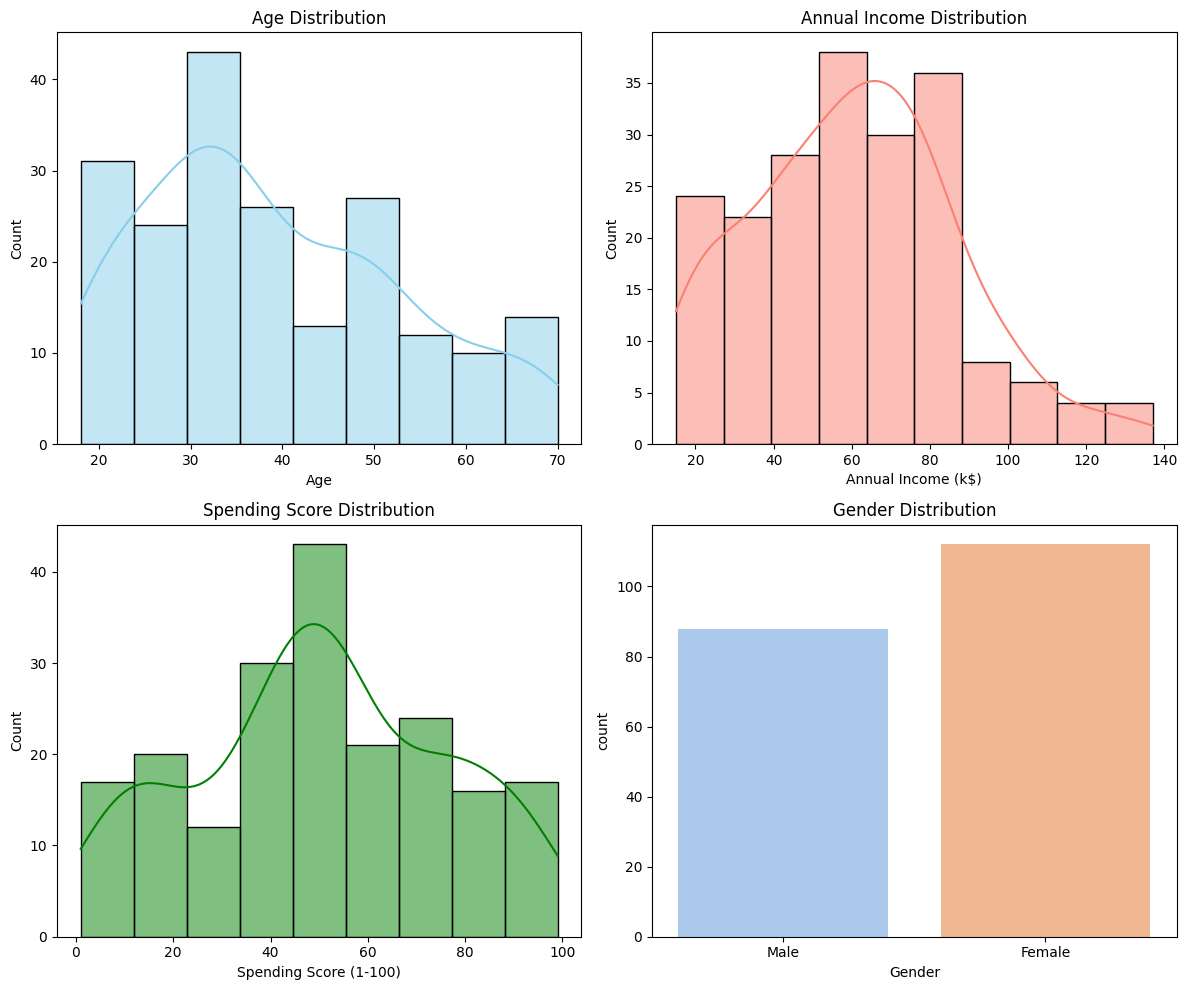

In [19]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Create a displot for 'Age'
sns.histplot(df['Age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

# Create a displot for 'Annual Income (k$)'
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Annual Income Distribution')

# Create a displot for 'Spending Score (1-100)'
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Spending Score Distribution')

# Create a countplot for 'Gender'
sns.countplot(x='Gender', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Gender Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


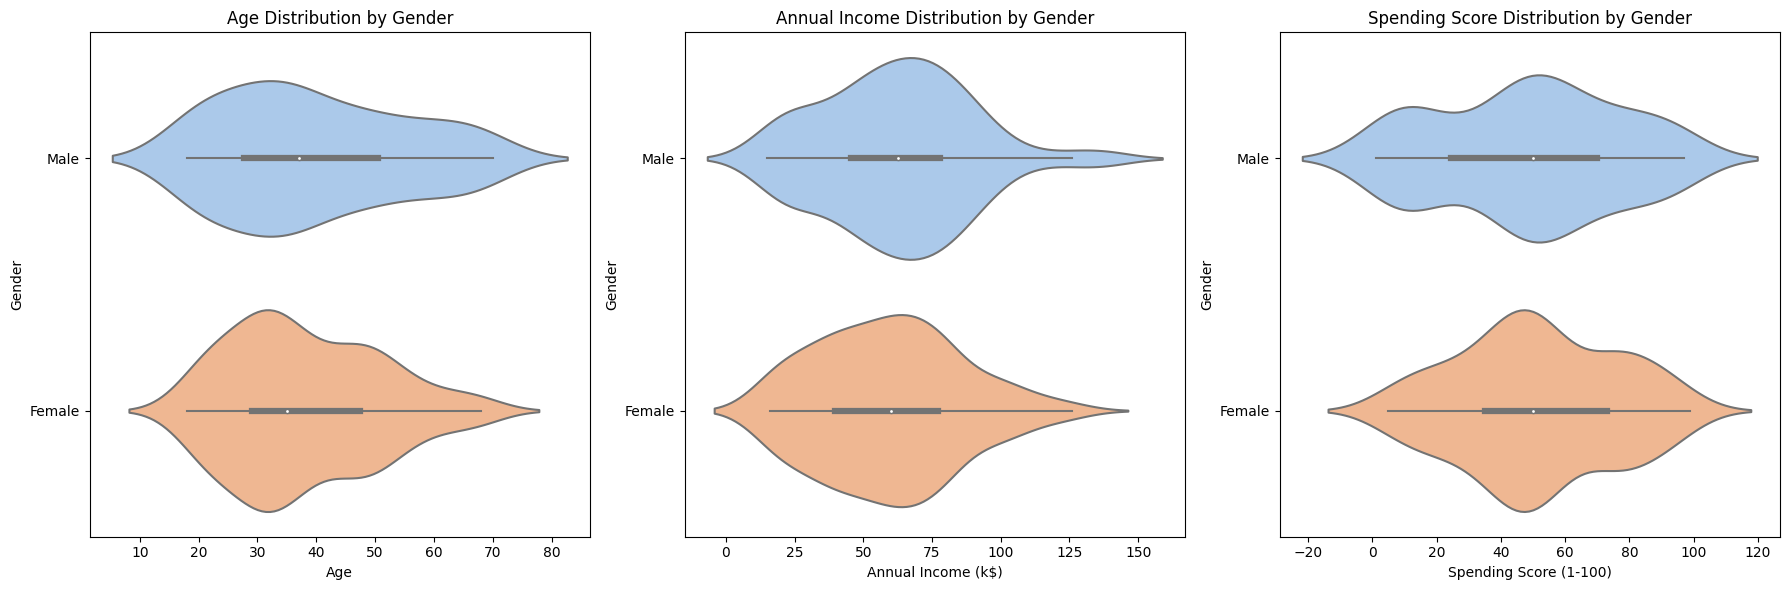

In [25]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Horizontal Violin plot for 'Age' based on gender
sns.violinplot(x='Age', y='Gender', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Age Distribution by Gender')

# Horizontal Violin plot for 'Annual Income (k$)' based on gender
sns.violinplot(x='Annual Income (k$)', y='Gender', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Annual Income Distribution by Gender')

# Horizontal Violin plot for 'Spending Score (1-100)' based on gender
sns.violinplot(x='Spending Score (1-100)', y='Gender', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Spending Score Distribution by Gender')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

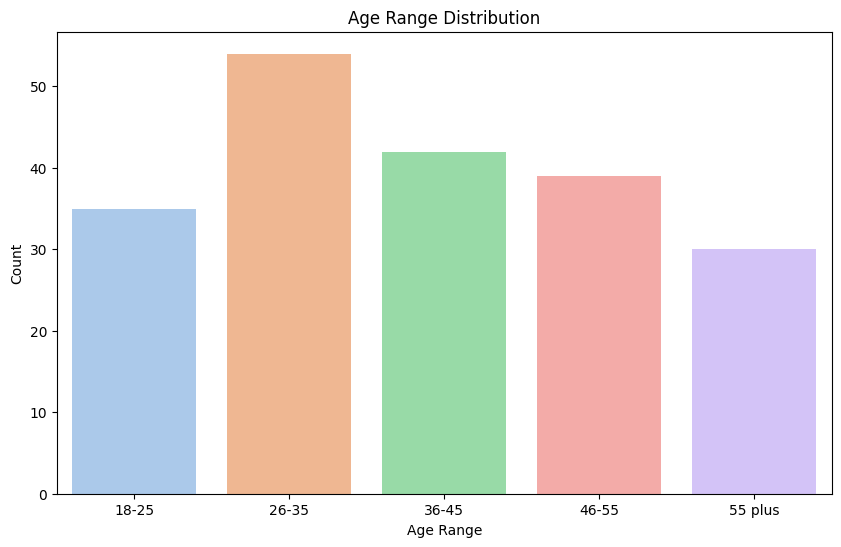

In [26]:
# Define age ranges
age_bins = [18, 25, 35, 45, 55, float('inf')]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55 plus']

# Create a new column 'Age Range' in the DataFrame
df['Age Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences of each age range
age_range_counts = df['Age Range'].value_counts().sort_index()

# Bar plot for the Age Range distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_range_counts.index, y=age_range_counts.values, palette='pastel')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')

# Show the plot
plt.show()

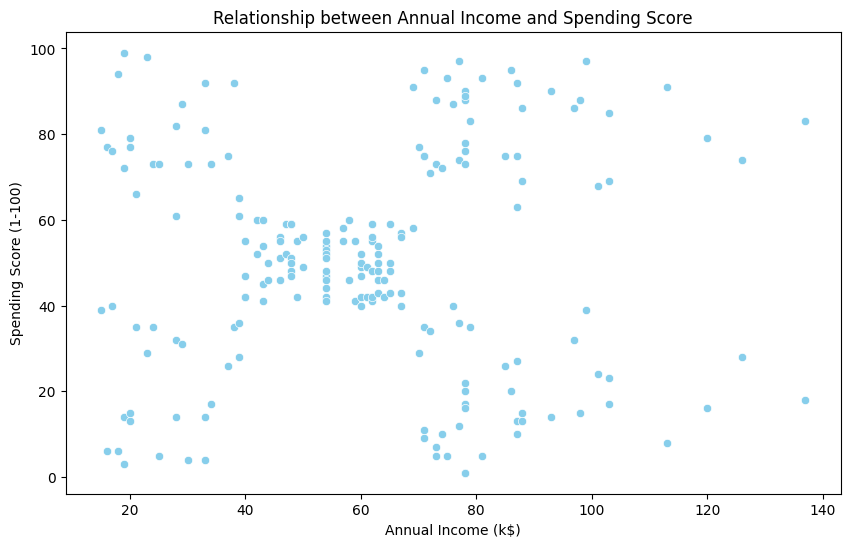

In [27]:

# Scatter plot for Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color='skyblue')
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()

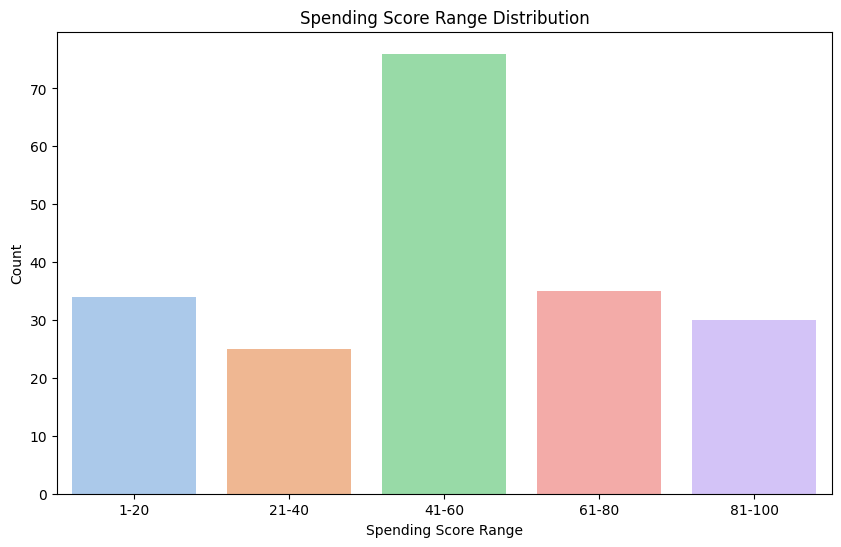

In [32]:
# Define spending score ranges
spending_score_bins = [0, 20, 40, 60, 80, 100]
spending_score_labels = ['1-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column 'Spending Score Range' in the DataFrame
df['Spending Score Range'] = pd.cut(df['Spending Score (1-100)'], bins=spending_score_bins, labels=spending_score_labels, right=False)

# Set up the figure with a bar plot for Spending Score Range distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Spending Score Range', data=df, palette='pastel', order=spending_score_labels)
plt.title('Spending Score Range Distribution')
plt.xlabel('Spending Score Range')
plt.ylabel('Count')

# Show the plot
plt.show()

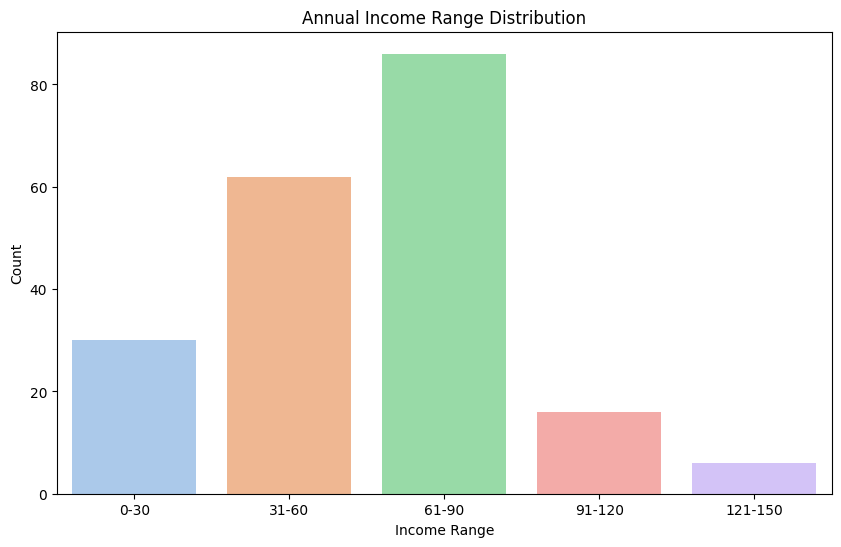

In [35]:
# Define annual income ranges
income_bins = [0, 30, 60, 90, 120, 150]
income_labels = ['0-30', '31-60', '61-90', '91-120', '121-150']

# Create a new column 'Income Range' in the DataFrame
df['Income Range'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)

# Set up the figure with a bar plot for Income Range distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Range', data=df, palette='pastel', order=income_labels)
plt.title('Annual Income Range Distribution')
plt.xlabel('Income Range')
plt.ylabel('Count')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

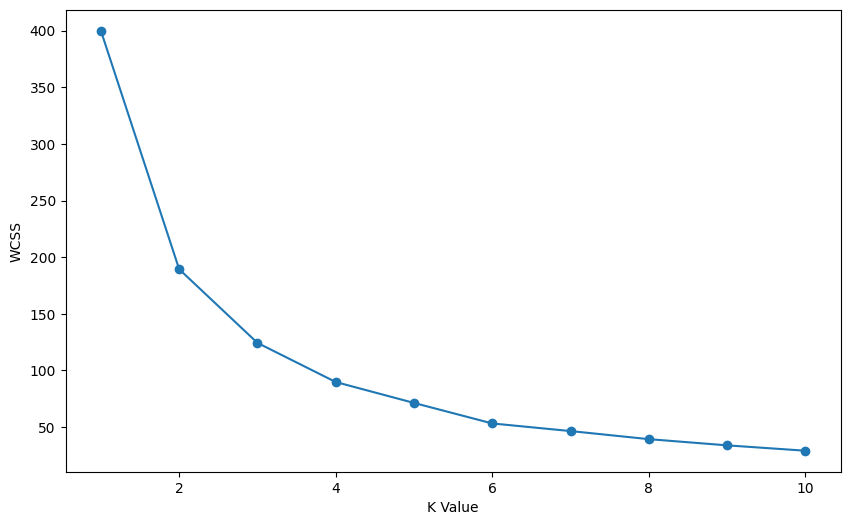

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = df[['Age', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calculate and plot the inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


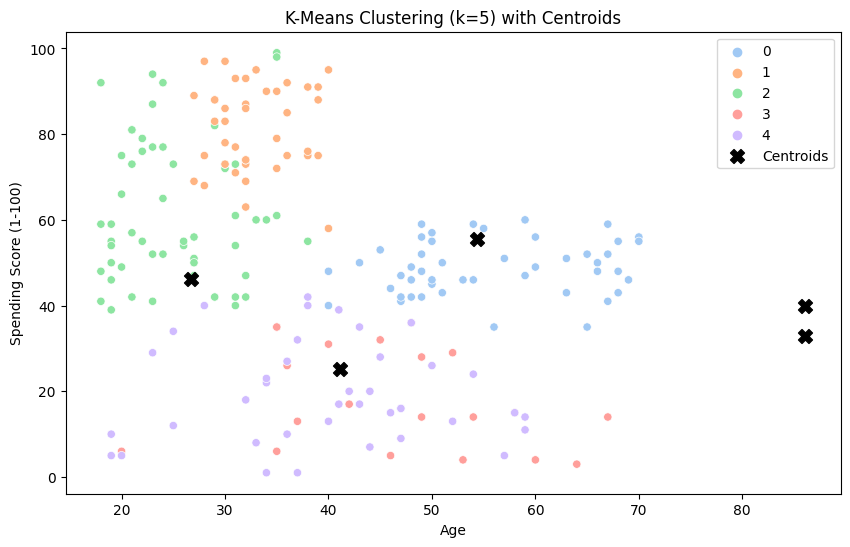

In [13]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Optimal K
optimal_k = 5

# Fit k-means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(data_scaled)

# Extract cluster centers
centroids = scaler.inverse_transform(kmeans_optimal.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette='pastel')

# Plot black points for centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

plt.title(f'K-Means Clustering (k={optimal_k}) with Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

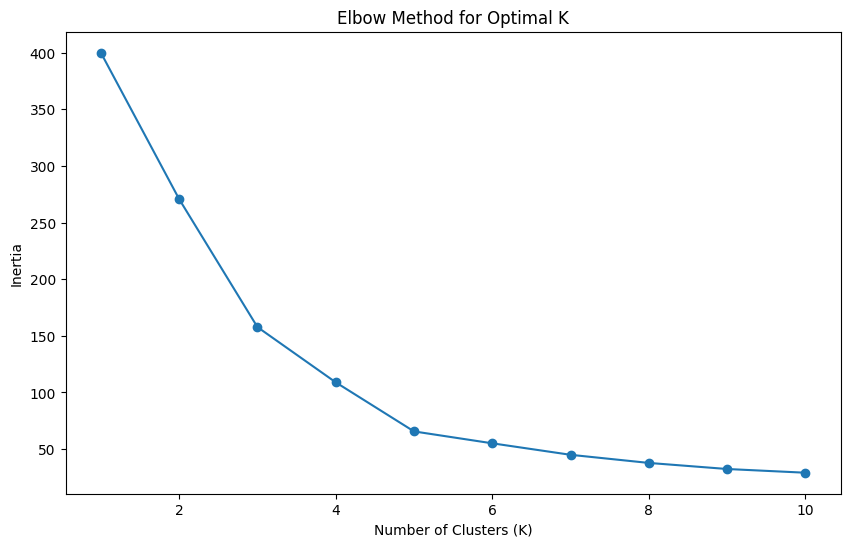

In [8]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calculate and plot the inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


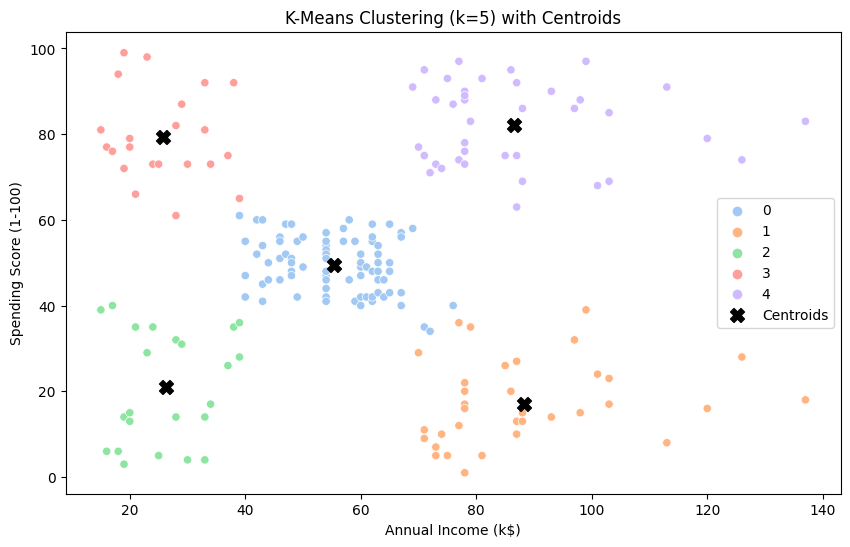

In [10]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Optimal K
optimal_k = 5

# Fit k-means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(data_scaled)

# Extract cluster centers
centroids = scaler.inverse_transform(kmeans_optimal.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='pastel')

# Plot black points for centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

plt.title(f'K-Means Clustering (k={optimal_k}) with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

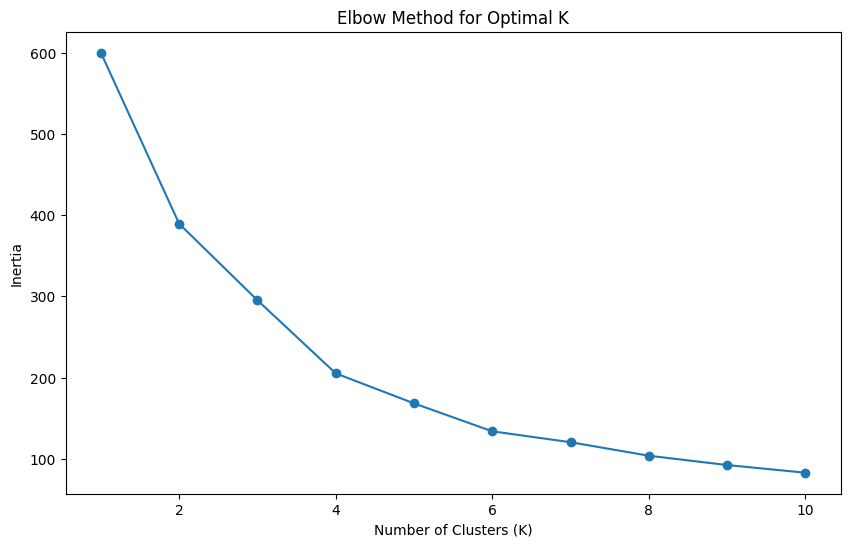

In [11]:
data = df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calculate and plot the inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


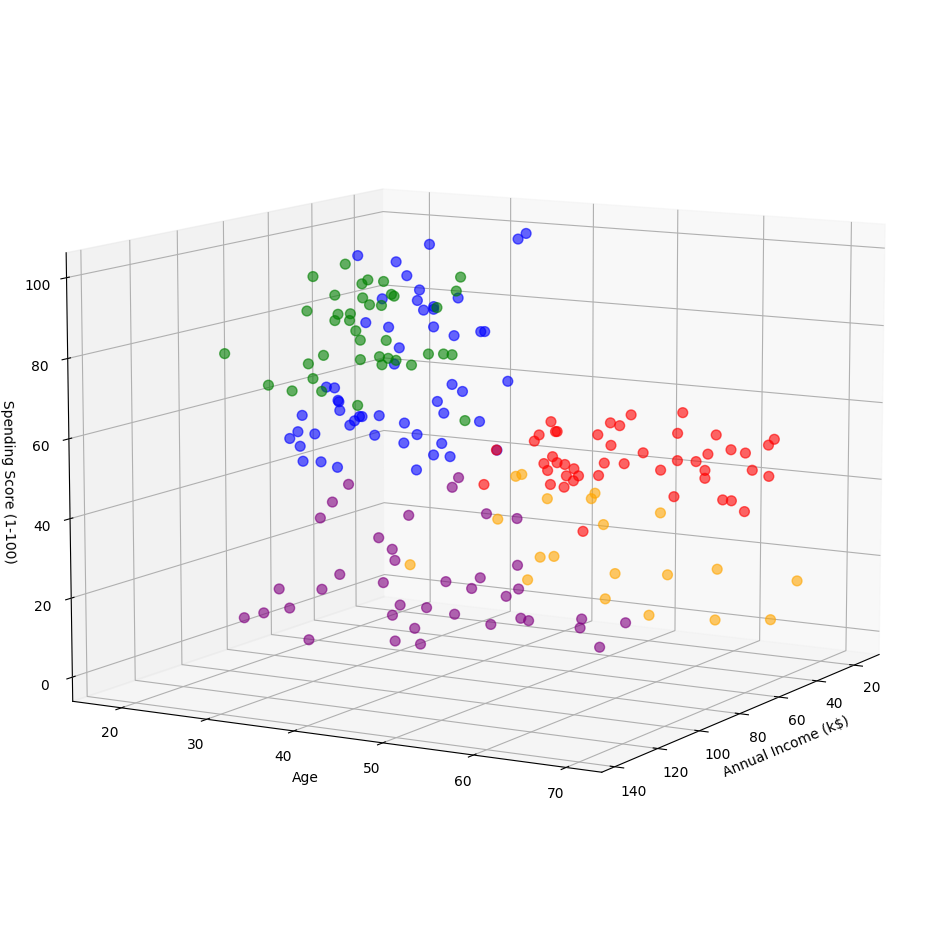

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Choose distinct colors for each cluster
cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'purple'}

# Choose the optimal number of clusters based on the elbow method
optimal_k = 5

# Fit k-means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(data_scaled)

# Map cluster labels to colors
colors = df['Cluster'].map(cluster_colors)

# Create a 3D scatter plot with a normal view and labels
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Annual Income (k$)', 'Age', and 'Spending Score (1-100)' with distinct cluster colors
scatter = ax.scatter(df['Annual Income (k$)'], df['Age'], df['Spending Score (1-100)'], c=colors, s=50, alpha=0.6)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')

# Set a normal view
ax.view_init(elev=10, azim=30)

plt.show()

